<a href="https://colab.research.google.com/github/AzrlShiro/Data-Mining/blob/main/Tugas_pendat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorical/Nominal Features

Tugas 1 ~ Menghitung Jarak

In [2]:
import numpy as np
import pandas as pd

In [12]:
# create dataset
dataset_url= "https://raw.githubusercontent.com/AzrlShiro/Data-Mining/main/train_passenger.csv"
data= pd.read_csv(dataset_url, index_col='PassengerId')

In [13]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [17]:
# Show dataset shape
number_of_columns = data.shape[1]
# Show all columns for dataset
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [18]:
# Show all columns from dataframe
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
data[["Name","Survived","Sex"]].head(5)

,Name,Survived,Sex
PassengerId,,,
1,"Braund, Mr. Owen Harris",0,male
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female
3,"Heikkinen, Miss. Laina",1,female
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female
5,"Allen, Mr. William Henry",0,male


In [20]:
# binary value
value1 = 1
value0 = 0

# sex
sex_for_men = "male"
sex_for_women = "female"

def change_sex_to_biner(sex):
  return value1 if sex == sex_for_men else value0

In [21]:
# update all values
data["Sex"] = data["Sex"].apply(change_sex_to_biner)

In [22]:
data[["Name","Survived","Sex"]].head(5)

,Name,Survived,Sex
PassengerId,,,
1,"Braund, Mr. Owen Harris",0,1
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0
3,"Heikkinen, Miss. Laina",1,0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0
5,"Allen, Mr. William Henry",0,1


In [23]:
data[["Name","Survived","Sex"]].tail(5)

,Name,Survived,Sex
PassengerId,,,
887,"Montvila, Rev. Juozas",0,1
888,"Graham, Miss. Margaret Edith",1,0
889,"Johnston, Miss. Catherine Helen ""Carrie""",0,0
890,"Behr, Mr. Karl Howell",1,1
891,"Dooley, Mr. Patrick",0,1


In [25]:
increment1 = 1
decrement1 = 1

probabilitas_table_value = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [26]:
def get(data,idx,series):
  return data.loc[(idx),series]

def perbedaan_dataset(data, series_index = [], series = []):
    first_series = get(data, series_index[0], series)
    second_series = get(data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [28]:
perbedaan_dataset(data, [1,2], ["Survived", "Sex"]).T

,1,2
Survived,0,1
Sex,1,0


In [29]:
data.loc[886:891, ["Survived", "Sex"]]

,Survived,Sex
PassengerId,,
886,0,0
887,0,1
888,1,0
889,0,0
890,1,1
891,0,1


In [43]:
def probabilitas(data, start_index = 0, last_index = 1):

    nilai_probabilitas = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }
    
    column_range = data.shape[1]

    for column in range(column_range):
        for value in probabilitas_table_value:
            item = list((tuple(data.loc[(start_index):(last_index), data.columns[column]]) == probabilitas_table_value[value], value))
            if item[0] == True:
                if item[1] == "q":
                    nilai_probabilitas["q"] += 1
                if item[1] == "r":
                    nilai_probabilitas["r"] += 1
                if item[1] == "s":
                    nilai_probabilitas["s"] += 1
                if item[1] == "t":
                    nilai_probabilitas["t"] += 1

    return nilai_probabilitas

In [74]:
# d(1,2)
data_1_2 = perbedaan_dataset(data, [1,2], ["Survived", "Sex"])

In [75]:
hasil1 = probabilitas(data_1_2, 1, 2)

In [76]:
# d(1,3)
data_1_3 = perbedaan_dataset(data, [1,3], ["Survived", "Sex"])

In [77]:
hasil2 = probabilitas(data_1_3, 1, 3)

In [78]:
# d(1,4)
data_1_4 = perbedaan_dataset(data, [1,4], ["Survived", "Sex"])

In [79]:
hasil3 = probabilitas(data_1_4, 1, 4)

In [81]:
# d(1,5)
data_1_5 = perbedaan_dataset(data, [1,5], ["Survived", "Sex"])

In [82]:
hasil4 = probabilitas(data_1_5, 1, 5)

Perbedaan

In [57]:
def jarak_perbedaan(nilai_probabilitas):

    return (nilai_probabilitas["r"] + nilai_probabilitas["s"]) / (nilai_probabilitas["q"] + nilai_probabilitas["r"] + nilai_probabilitas["s"])

In [83]:
data_1_2 = jarak_perbedaan(hasil1)
data_1_3 = jarak_perbedaan(hasil2)
data_1_4 = jarak_perbedaan(hasil3)
data_1_5 = jarak_perbedaan(hasil4)

print(f'{data_1_2} \n{data_1_3} \n{data_1_4} \n{data_1_5}')

1.0 
1.0 
1.0 
0.0


# Tugas 2 : Diskritisasi

In [84]:
import pandas as pd
import math 
from sklearn.preprocessing import KBinsDiscretizer

In [85]:
iris = pd.read_csv("https://raw.githubusercontent.com/AzrlShiro/Data-Mining/main/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
sepal_length = iris.SepalLengthCm
res = sepal_length.values.reshape(-1,1)
a = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')
a.fit(res)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [90]:
sepalL = a.transform(res)
data1 = pd. DataFrame(sepalL, columns = ["Sepal Length"])

In [91]:
data1

,Sepal Length
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [92]:
sepal_width = iris.SepalWidthCm
res1 = sepal_length.values.reshape(-1,1)
b = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')
b.fit(res1)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [93]:
sepalW = a.transform(res1)
data2 = pd. DataFrame(sepalW, columns = ["Sepal Width"])

In [94]:
data2

,Sepal Width
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [95]:
petal_length = iris.PetalLengthCm
res2 = petal_length.values.reshape(-1,1)
a1 = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')
a1.fit(res2)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [99]:
petalL = a.transform(res2)
data3 = pd. DataFrame(petalL, columns = ["Petal Length"])

In [100]:
data3

,Petal Length
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,1.0
146,0.0
147,1.0
148,1.0


In [98]:
petal_width = iris.PetalWidthCm
res3 = petal_width.values.reshape(-1,1)
b1 = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')
b1.fit(res3)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [101]:
petalW = a.transform(res3)
data4 = pd. DataFrame(petalW, columns = ["Petal Width"])

In [102]:
data4

,Petal Width
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,0.0
146,0.0
147,0.0
148,0.0


In [104]:
data_list = [data1, data2, data3, data4, iris.Species]
data_all = pd.concat(data_list, axis = 1) #menggabungkan data
data_all

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,0.0,0.0,0.0,0.0,Iris-setosa
1,0.0,0.0,0.0,0.0,Iris-setosa
2,0.0,0.0,0.0,0.0,Iris-setosa
3,0.0,0.0,0.0,0.0,Iris-setosa
4,0.0,0.0,0.0,0.0,Iris-setosa
...,...,...,...,...,...
145,2.0,2.0,1.0,0.0,Iris-virginica
146,2.0,2.0,0.0,0.0,Iris-virginica
147,2.0,2.0,1.0,0.0,Iris-virginica
148,2.0,2.0,1.0,0.0,Iris-virginica


In [105]:
data_all.to_csv("DataIris.csv")

# Tugas 3 : K-Nearest Neighbor

In [122]:
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# Hitung Data

> Pisahkan kolom "Species" dari dataframe
Ambil kolom "Species" sebagai target kolom untuk kategori kelas
Pisahkan data latih dengan data tes


* data latih (nilai data)

  X_train 

* data tes (nilai data)

  X_test 

* data latih (kelas data)

  y_train

* data tes (kelas data)

  y_test

In [109]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [114]:
print(f'{iris.feature_names} \n\n{iris.target} \n\n{iris.target_names}')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

['setosa' 'versicolor' 'virginica']


In [115]:
# memisahkan dataset ke train and test data
from sklearn.model_selection import train_test_split

In [121]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(
X_train.shape,'\n',
X_test.shape,'\n',
y_train.shape,'\n',
y_test.shape
)

(120, 4) 
 (30, 4) 
 (120,) 
 (30,)


In [124]:
# Membuat KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

Text(0, 0.5, 'test keakuratan')

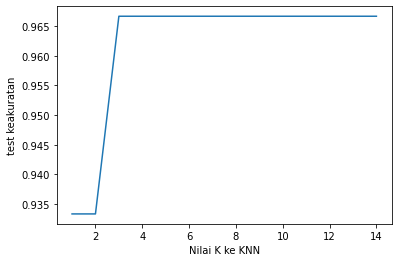

In [131]:
k_range = range(1,15)
nilai = {}
list_nilai = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred= knn.predict(X_test)
  nilai[k]=metrics.accuracy_score(y_test, y_pred)
  list_nilai.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, list_nilai)
plt.xlabel('Nilai K ke KNN')
plt.ylabel('test keakuratan')

In [132]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

new = [[1,3,2,4], [6,3,3,2]]
y_predict = knn.predict(new)

print(f'{classes[y_predict[0]]}\n{classes[y_predict[1]]}')

setosa
versicolor


# Tugas 4 : Naive Bayes

In [133]:
import pandas as pd
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [135]:
dataset_url = "https://raw.githubusercontent.com/AzrlShiro/Data-Mining/main/Iris.csv"
iris = pd.read_csv(dataset_url)
iris
iris.drop(columns="Id",inplace=True)

In [136]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [137]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [138]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [139]:
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

In [140]:
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000
